# Week 4 Quiz

## [Zhuyan Li] - [zl2276]

### Due Sunday Oct 11 7:00pm ET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

We're going to calculate the 95% confidence interval for the mean value of 'magnesium' from our wine dataset.

In [2]:
# Read in ../data/wine_dataset.csv as df
df = pd.read_csv('../data/wine_dataset.csv')

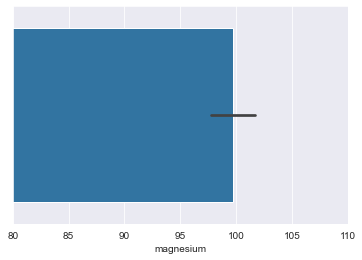

In [3]:
# Generate a barplot of the 'magnesium' column with 95% confidence intervals using barplot
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
ax = sns.barplot(x='magnesium', data=df)

# To zoom in, set the xlimits using ax.set_xlim(80,110)
ax.set_xlim(80,110);

In [4]:
# Assign the mean value of magnesium to variable observed_mean
observed_mean = df.magnesium.mean()

# Print the observed mean to the hundredths place
print(f'{observed_mean:0.2f}')

99.74


In [5]:
# generate a bootstrap sample (with the same number of values as the original dataset)
#   using pandas sample (with replacement) 
#   using random_state=123 so our answers will match
#   assign the result to sample
sample = df.magnesium.sample(len(df), replace=True, random_state=123)

# Print the mean of the sample to the hundredths place
# Note: if the sample mean is the same as the observed mean, 
#       check, are you sampling with replacement?
print(f'{sample.mean():0.2f}')

98.69


In [6]:
# Generate 1000 additional sample means using bootstrap sampling from the 'magnesium' column
#   each sample should have the same length as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means
sample_means = []
for i in range(1000):
    sample = df.magnesium.sample(len(df), replace=True)
    sample_means.append(sample.mean())
    
# Print the first 5 values in sample_means
sample_means[:5]

[100.36516853932584,
 100.67415730337079,
 99.2752808988764,
 99.25280898876404,
 100.75842696629213]

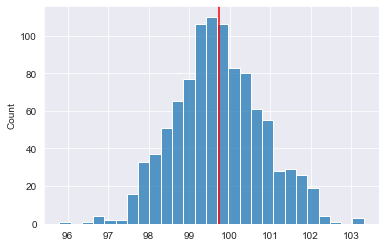

In [7]:
# Plot the distribution of sample means using sns.histplot
# Store the returned axis in ax
ax = sns.histplot(x=sample_means)

# Add a vertical line located at the observed mean on the x-axis using ax.axvline()
#   Set the color of the line to 'red'
# The observed_mean should fall near the center of the distribution.
ax.axvline(observed_mean, color='r')

In [8]:
# To get the 95% confidence interval, we need want to retain the central 95% of our sample means.
# To do this we need to first determine how many values must be trimmed from the ends of the sorted array.
# For 95% CI, we want to trim 1/2 of 5% from each end.
# Calculate 2.5% of the length of sample_means and store as trim_amount.
trim_amount = 0.5 * (1-0.95)

# print the trim_amount, the number of elements we'll trim from each end of the sorted list
trim_amount

0.025000000000000022

In [9]:
# We want to index into our sample means, but trim_amount is a float.
# We must be first round this value and converted to an integer.
# Use np.round() to round and int() to convert to int and store the result in trim_idx.
trim_idx = int(np.round(trim_amount*1000))

# Print trim_idx
trim_idx

25

In [10]:
# We can now print the 95% CI for our measure by indexing into the sorted array of sample means.
# Use np.sorted() to return a sorted numpy array 
#   then use a list of the indices we want, [trim_idx,-trim_idx], to index into this sorted array.
# Store the 95% CI values as ci
ci = np.sort(sample_means)[[trim_idx,-trim_idx]]

# Print the ci values and visually compare the endpoints of the CI in the barplot above.
ci

array([ 97.73595506, 101.9494382 ])